# Kalorimetrie Laborversuch

Author: Santiago Ramirez Saldana

Datum: 10/12/2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Können mit dem Kalorimeter-Experiment zuverlässige Ergebnisse erzielt werden?


## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


Für den Versuch wird Wasser in einem Topf benötigt, der von einen Garer erhitzt wird. Im nächsten Schritt wird ein Glasbecher mit Wasser gefüllt, wobei das Gewicht zu berücksichtigen ist. Im Inneren des Glases wird ein Magnet angebracht, der dafür sorgt, dass das Wasser an allen Stellen des Glases die gleiche Temperatur hat. Um die Temperatur zu messen, werden fünf Sensoren benötigt. Einer befindet sich im Topf, drei im Glasbecher und der letzte misst die Umgebungstemperatur.  
Für das Experiment werden drei Zylinder aus verschiedenen Materialien benötigt. Die drei Zylinder werden in den Topf gestellt, wodurch sie sich erhitzen. Anschließend wird einer der Zylinder in das Becherglas mit kaltem Wasser gestellt und für eine bestimmte Zeit stehen gelassen. Schließlich wird die Temperaturänderung des Wassers während des Prozesses mit Hilfe von Sensoren gemessen und die Wärmekapazität des Materials kann bestimmt werden.

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Heat_Capacity/data.h5"

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_environment = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


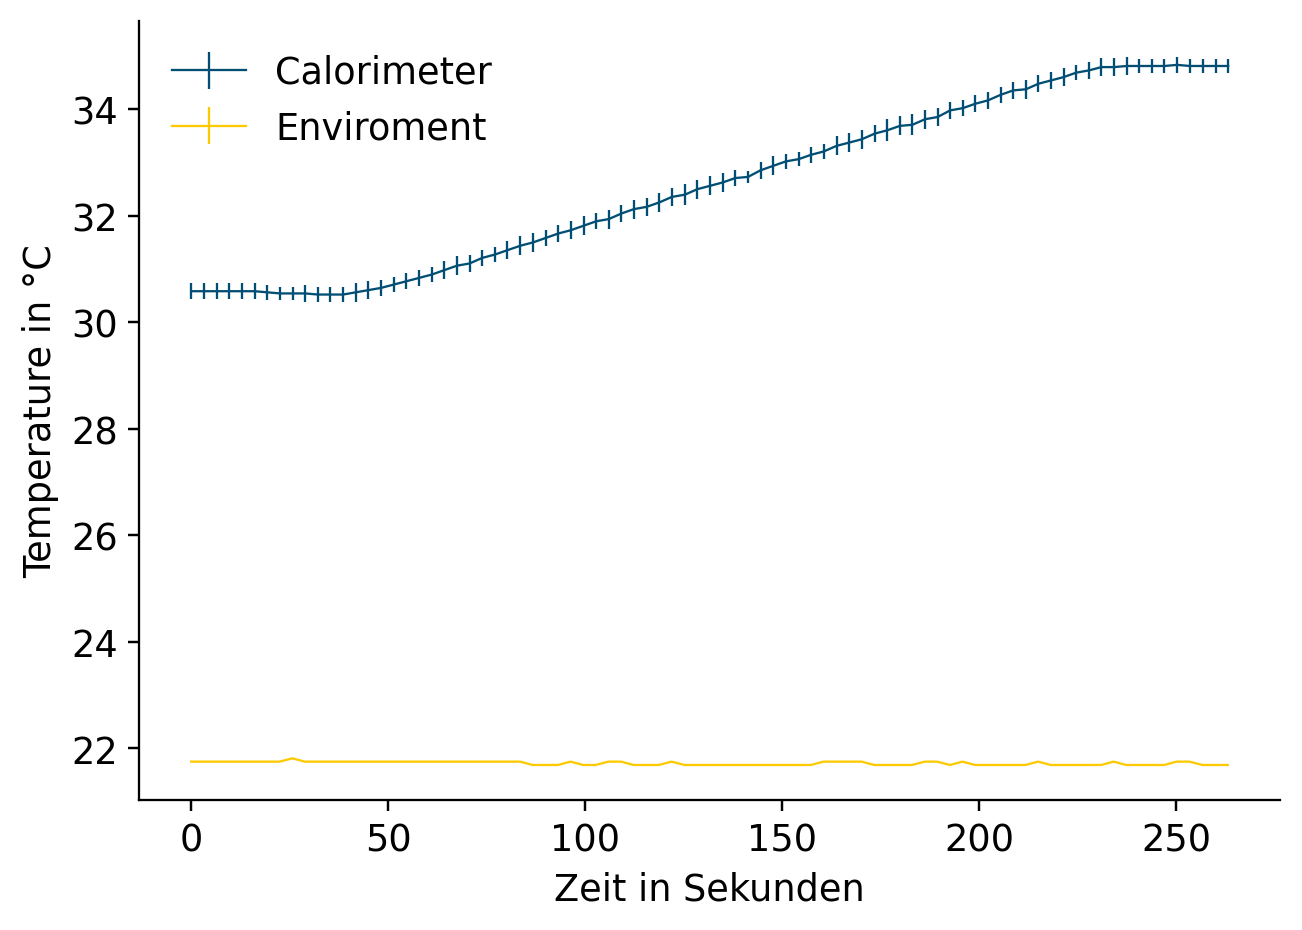

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
time_env = np.mean(data_dict["timestamp"][index_environment],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]], ["Calorimeter", "Enviroment"], "Zeit in Sekunden","Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("datasheets", "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium", "mass", "value"])

# DONE #

In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

with h5.File(datafile_path_const, "r") as f:
    current = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current"][()]
    heat_time = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time"][()]
    voltage = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage"][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

print(temperature_end, temperature_start)
# DONE #

34.9375 30.3125


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const =  (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
calorimeter_const

1914.8108108108108

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC003/PDC003.h5"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

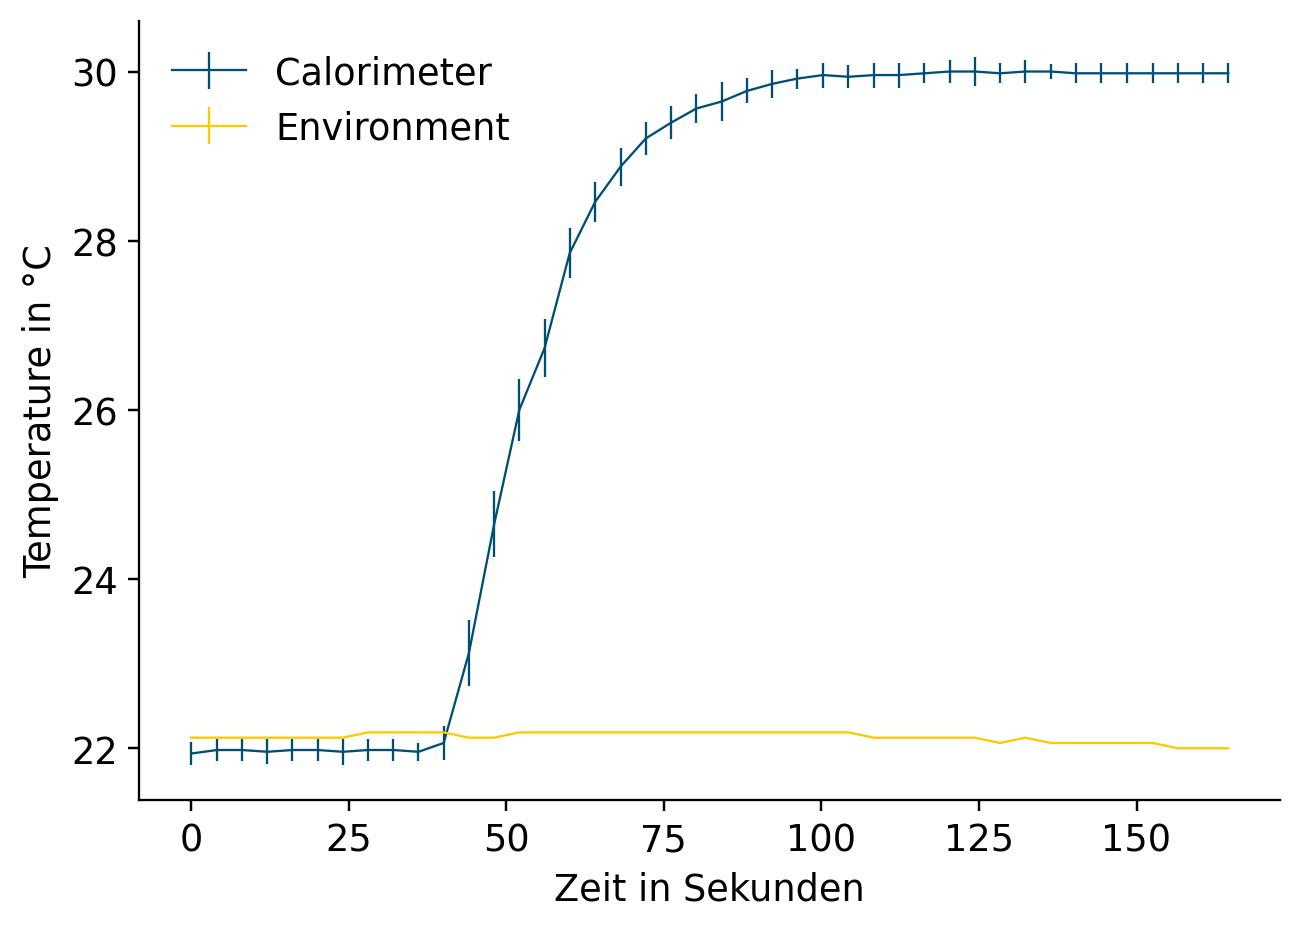

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Calorimeter", "Environment"],"Zeit in Sekunden","Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b2e-d878-640b-b947-b68f86e0e1c9", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [21]:
sample_heat_capa

0.5237928132506164

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC012/PDC012.h5"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

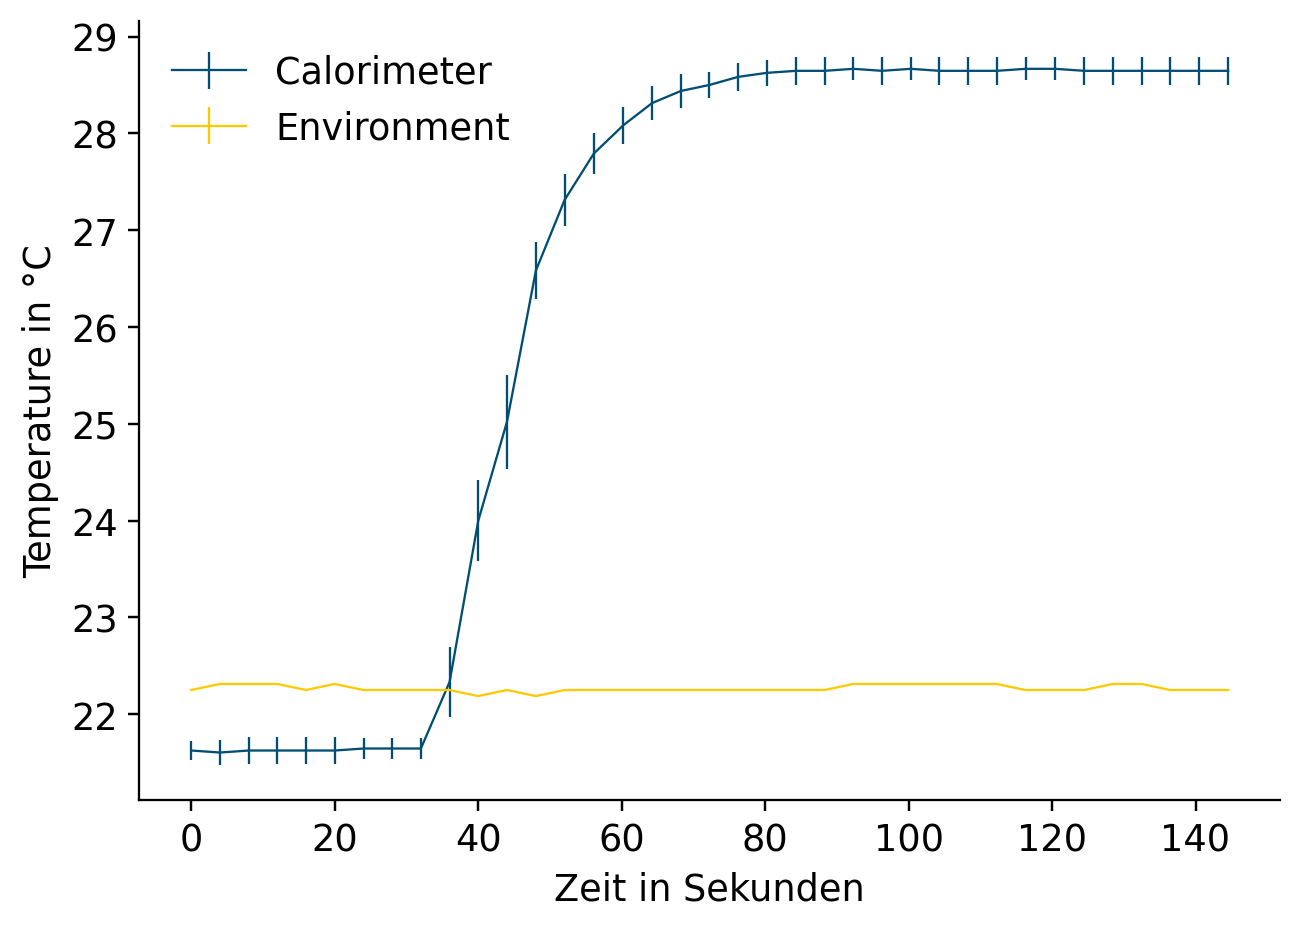

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Calorimeter", "Environment"],"Zeit in Sekunden","Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass =  m_json.get_json_entry("datasheets", "1ee57b38-1b08-63da-8b38-63a271236a0b", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [31]:
sample_heat_capa

0.4074091986264932

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC028/PDC028.h5"

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]
# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

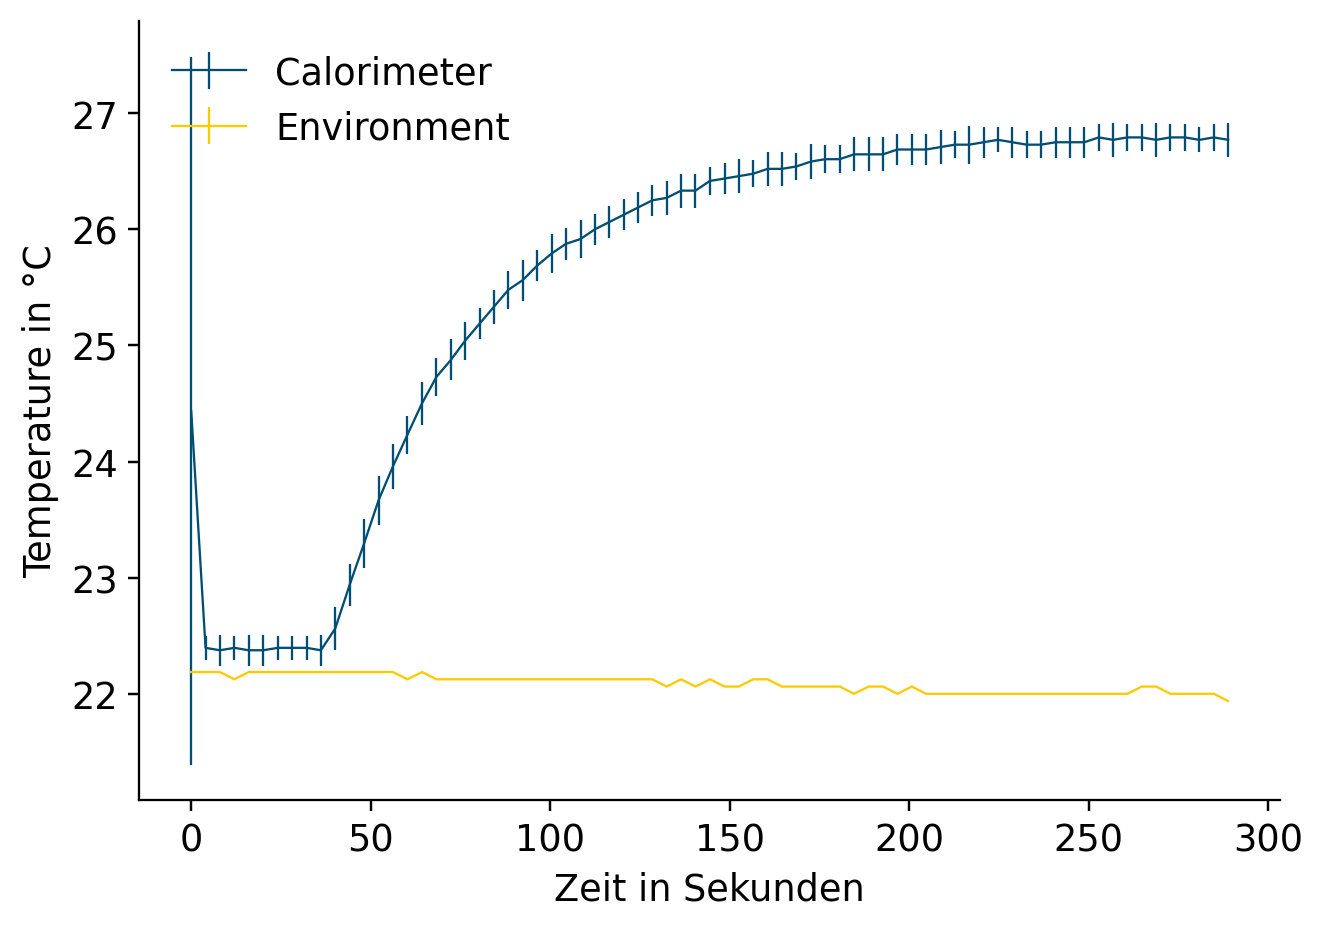

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Calorimeter", "Environment"],"Zeit in Sekunden","Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee7d44b-07b6-6af8-adbe-d5e4818c9942", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter])

# DONE #

In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [41]:
sample_heat_capa

2.682442099203377

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Mit Hilfe der im Experiment gewonnenen Daten werden in dieser Ausarbeitung die Wärmekapazitäten der verschiedenen Materialien berechnet. Wie man sehen kann, ist das Material mit dem höchsten Wert PA 66, gefolgt von dem Material Edelstahl und schließlich Messing. Wenn man die Ergebnisse mit den tatsächlichen Werten vergleicht, sieht man, dass sie nur eine sehr geringe Abweichung haben. Die minimale Abweichung kann auf verschiedene Faktoren zurückzuführen sein. Während des Experiments sollte eine Probe aus dem Topf genommen und in das Becherglas gewechselt werden. Während des Transports kommt die Probe mit der Luft in Berührung, so dass die Temperatur sinkt.Außerdem kann es vorkommen, dass Wasser aus dem Topf auf der Oberseite der Probe verbleibt und mit dem Wasser im Becherglas in Kontakt komm.Trotz der geringen Abweichung kann man sagen, dass das Experiment einen hohen Genauigkeitsgrad hat und die Werte für weitere Berechnungen verwendet werden können, sofern ein Mindestkontakt der Probe mit der Luft aufrechterhalten wird und das gesamte Wasser auf der Oberseite der Probe vor dem Transport entfernt wird. 



## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Während des Experiments habe ich gelernt, dass es sehr wichtig ist, geordnet und strukturiert vorzugehen. Wenn man in einem Schritt einen Fehler macht, muss man ihn korrigieren, sonst werden die nächsten Schritte falsch sein. Außerdem habe ich erkannt, welchen Einfluss Störgrößen während eines Experiments auf die Ergebnisse haben und dass man sie verhindern oder versuchen muss zu korrigieren, um Ergebnisse zu erhalten, die für die weitere Verwendung geeignet sind.